<a href="https://colab.research.google.com/github/Mateus-cpa/tratamento_de_relatorio_elog_pf/blob/main/Tratamento_de_relat%C3%B3rio_geral_do_elog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como utilizar
1. Menu Ambiente de execução
2. Comando "Executar tudo"
3. Em "Carregamento de dados", informe a UG no campo em branco
4. Após, Clique no botão "Escolher arquivos" e carregue a lista exportada pelo eLog
5. Aguarde o programa processar
6. O arquivo processado será baixado.

# Exportar para a planilha de levantamento
1. Copie SOMENTE o texto da

# Importação de bibliotecas


In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import io
import os

# Carregamento de dados

In [2]:
ugs = [
    'SRAC',
    'SRAL',
    'SRAP',
    'SRAM',
    'SRBA',
    'SRCE',
    'CGAD',
    'SRDF',
    'DITEC',
    'DIREN',
    'DTI',
    'SRES',
    'FIG',
    'SRGO',
    'SRMA',
    'SRMT',
    'SRMS',
    'SRMG',
    'SRPA',
    'SRPB',
    'SRPR',
    'SRPE',
    'SRPI',
    'SRRJ',
    'SRRN',
    'SRRS',
    'SRRO',
    'SRRR',
    'SRSC',
    'SRSP',
    'SRSE',
    'SRTO']

while True:
    print(ugs)
    selected_UG = "SRPR"
    selected_UG = input().upper()
    if selected_UG in ugs:
        break
    else:
        print("UG inválida")



['SRAC', 'SRAL', 'SRAP', 'SRAM', 'SRBA', 'SRCE', 'CGAD', 'SRDF', 'DITEC', 'DIREN', 'DTI', 'SRES', 'FIG', 'SRGO', 'SRMA', 'SRMT', 'SRMS', 'SRMG', 'SRPA', 'SRPB', 'SRPR', 'SRPE', 'SRPI', 'SRRJ', 'SRRN', 'SRRS', 'SRRO', 'SRRR', 'SRSC', 'SRSP', 'SRSE', 'SRTO']
srpb


In [3]:
#importar os dados da pasta do computador
uploaded = files.upload()
filename = next(iter(uploaded))
#df = pd.read_excel(io.BytesIO(uploaded[filename]), engine='calamine')

Saving lista_bens-srpb.xlsx to lista_bens-srpb.xlsx


In [4]:
df = pd.read_excel(io.BytesIO(uploaded[filename]))

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
def pega_tamanho_em_mb(filepath):
  """ Retorna o tamanho de um arquivo em Mb. """
  tamanho_em_bytes = os.path.getsize(filepath)
  tamanho_em_mb = tamanho_em_bytes / (1024 * 1024)
  return tamanho_em_mb

filepath = f'/content/{filename}'
tamanho_antigo_arquivo = pega_tamanho_em_mb(filepath)
print(f"O tamanho do arquivo é: {tamanho_antigo_arquivo} MB")

O tamanho do arquivo é: 8.861867904663086 MB


In [6]:
#configurar num tombamento como índice
base_elog = df.copy()
base_elog['index'] = base_elog['num tombamento']
base_elog.set_index('index')
base_elog.columns

Index(['unidade responsavel material', 'codigo', 'grupo de material',
       'codigo material', 'subgrupo de material', 'num tombamento',
       'acautelado para', 'matricula detentor', 'validado eletron',
       'data assinatura',
       ...
       'tensao', 'tensao de alimentacao', 'tipo', 'tipo de identificacao',
       'tipo de propriedade', 'tipo de veiculo.1', 'velocidade de varredura',
       'voltagem', 'zoom otico', 'index'],
      dtype='object', length=138)

# Processamento dos dados

In [7]:
qtde_bens = len(base_elog.index)

#contar a quantidade de bens
print(f'quantidade de bens: {qtde_bens}')

#retornar a proporção de valores nulos em cada coluna
df_null = base_elog.isnull().sum()/qtde_bens*100
df_null.sort_values(ascending=False).head(30)

quantidade de bens: 18943


,0
material da estrutura,100.000000
velocidade de varredura,100.000000
qtd de canais,100.000000
qtd de nivel,100.000000
revestimento,100.000000
carga,100.000000
qtd de rodas,100.000000
acabamento da estrutura,100.000000
bordas,100.000000
observacao bloqueio,100.000000


In [8]:
#colunas no arquivo original
qtde_colunas_antes = len(base_elog.columns)
print(f'quantidade de colunas antes: {qtde_colunas_antes}')

base_elog.columns.values

quantidade de colunas antes: 138


array(['unidade responsavel material', 'codigo', 'grupo de material',
       'codigo material', 'subgrupo de material', 'num tombamento',
       'acautelado para', 'matricula detentor', 'validado eletron',
       'data assinatura', 'lotacao detentor', 'data acautelamento',
       'data cadastro', 'denominacao', 'especificacao', 'marca',
       'observacao', 'anulado', 'estado bem', 'status', 'bem terceiros',
       'data balanco', 'data inicio uso', 'ano balanco', 'garantia',
       'data fabricacao', 'data validade', 'localidade',
       'ultimo levantamento', 'unidade tombamento', 'valor',
       'valor entrada', 'valor acumulado', 'depreciavel',
       'valor depreciacao acumulada', 'data ultimo ajuste', 'vida util',
       'vida util base depreciacao', 'data ultimo ajuste depreciacao',
       'tipo bloqueio', 'observacao bloqueio', 'matriz',
       'nivel de protecao da placa', 'qtd de rodas',
       'acabamento da estrutura', 'ano de fabricacao', 'ano do modelo',
       'aplicacao

In [9]:
#checar se colunas de números de série existem na planilha
cols_to_check = ['imei','n de serie', 'numero de serie',
                'numero de serie.1', 'numero de serie  ',
                 'num serie', 'placa', 'placa  ', 'placa vinculada',
                 'placa oficial', 'placa ','numero de serie.2',
                 'n  serie']

existing_serie_cols = [col for col in cols_to_check if col in base_elog.columns]

print(existing_serie_cols)


#checar se colunas de modelo existem na planilha
cols_to_check = ['modelo', 'modelo  ', 'modelo    ', 'modelo1', 'modelo.1']

existing_modelo_cols = [col for col in cols_to_check if col in base_elog.columns]

print(existing_modelo_cols)


# checar se colunas de marca existem na planilha
cols_to_check = ['marca','marca.1', 'marca1']

existing_marca_cols = [col for col in cols_to_check if col in base_elog.columns]

print(existing_marca_cols)


#checar se colunas de tombo antigo existem na planilha
cols_to_check = ['tombo antigo', 'tombo antigo.1']

existing_tombo_antigo_cols = [col for col in cols_to_check if col in base_elog.columns]

print(existing_tombo_antigo_cols)


# checar se colunas de especificações na planilha
cols_to_check = ['observacao bloqueio', 'matriz', 'qtd de rodas',
                'acabamento da estrutura', 'altura', 'ano de fabricacao',
                'ano do modelo', 'aplicacao', 'bordas', 'calibre', 'calibre  ',
                'carga', 'data de validade', 'destino', 'genero', 'largura',
                'lote  numeros e letras sem espacos e caracteres especiais ',
                'material', 'material do assento e encosto',
                'material revestimento assento e encosto',
                'memoria de armazenamento', 'necessita ser substituido', 'nivel de protecao',
                'numero de chassis', 'numero de raias',
                    'num serie  chassis',
                'ostensivo', 'profundidade', 'qtd de gavetas',
                'qtd de passageiros', 'qtd de portas', 'renavam',
                'sentido das raias', 'servidor responsavel', 'tamanho  novo ',
                'tipo de veiculo', 'alcance',
                'ano de fabricacao.1', 'aplicacao.1', 'blindagem', 'calibre.1',
                'capacidade', 'capacidade de tiros', 'combustivel',
                'compartimento cela', 'contraste', 'cor', 'cor predominante',
                'dimensao', 'espaco disco rigido', 'faixa de operacao',
                'frequencia', 'heavy duty', 'impedancia', 'interface',
                'largura de leitura', 'material.1', 'material da estrutura',
                'meio de aquisicao', 'numero de portas',
                'padrao de leitura', 'peso',
                'polegadas', 'potencia', 'potencia  cv ', 'qtd de canais',
                'qtd de nivel', 'qtd memoria ram', 'resolucao', 'revestimento',
                'tamanho da tela', 'taxa de transferencia', 'tensao',
                'tensao de alimentacao', 'tipo', 'tipo de identificacao',
                'tipo de propriedade', 'velocidade de varredura', 'voltagem',
                'zoom otico', 'nivel de protecao da placa', 'tipo do monitor',
                'carga.1',	'classe',	'portas',	'tanque',	'velocidade',
                'volume', 'bitola do pneu', 'numero do registro', 'qtde de canais',
                'nome da embarcacao', 'numero de registro','tipo de veiculo.1',
                'descritor especial','temporario']

existing_especificacoes_cols = [col for col in cols_to_check if col in base_elog.columns]

print(existing_especificacoes_cols)

['imei', 'n de serie', 'numero de serie', 'numero de serie.1', 'numero de serie  ', 'num serie', 'placa', 'placa  ', 'placa vinculada', 'placa oficial']
['modelo', 'modelo  ', 'modelo    ', 'modelo1', 'modelo.1']
['marca', 'marca.1', 'marca1']
['tombo antigo', 'tombo antigo.1']
['observacao bloqueio', 'matriz', 'qtd de rodas', 'acabamento da estrutura', 'ano de fabricacao', 'ano do modelo', 'aplicacao', 'bordas', 'calibre', 'carga', 'data de validade', 'destino', 'genero', 'lote  numeros e letras sem espacos e caracteres especiais ', 'material', 'memoria de armazenamento', 'necessita ser substituido', 'nivel de protecao', 'numero de chassis', 'numero de raias', 'num serie  chassis', 'ostensivo', 'profundidade', 'qtd de gavetas', 'qtd de passageiros', 'qtd de portas', 'renavam', 'sentido das raias', 'servidor responsavel', 'tamanho  novo ', 'tipo de veiculo', 'alcance', 'ano de fabricacao.1', 'aplicacao.1', 'blindagem', 'calibre.1', 'capacidade', 'capacidade de tiros', 'combustivel', 'c

In [10]:
# criar coluna de serie que compilará os demais números de série
base_elog['serie_total'] = None
base_elog['modelo_total'] = None
base_elog['especificacoes'] = None
base_elog['tombo_antigo'] = None
base_elog['marca_total'] = None


lista_colunas_exibir = ['denominacao','serie_total', 'modelo_total', 'tombo_antigo', 'marca_total', 'especificacoes']



In [11]:
#define as funções
def create_especificacoes(row):
    especificacoes = {}
    for col in existing_especificacoes_cols:
        if col in row and not pd.isna(row[col]):
            especificacoes[col] = row[col]
    return especificacoes

def compile_series(row, existing_serie_cols):
    lista_numero_series = []
    for col in existing_serie_cols:
        value = row[col]
        if not pd.isna(value) and value not in [" ","", ".", "..."]:
            lista_numero_series.append(str(value).strip())

    lista_numero_series = list(set(lista_numero_series))
    return ', '.join(lista_numero_series)

def compile_modelo(row, existing_modelo_cols):
    lista_modelo = []
    for col in existing_modelo_cols:
        value = row[col]
        if not pd.isna(value) and value not in [" ","", ".", "..."]:
            lista_modelo.append(str(value).strip())

    lista_modelo = list(set(lista_modelo))
    return ', '.join(lista_modelo)

def compile_marca(row, existing_marca_cols):
    lista_marca = []
    for col in existing_marca_cols:
        value = row[col]
        if not pd.isna(value) and value not in [" ","", ".", "..."]:
            lista_marca.append(str(value).strip())

    lista_marca = list(set(lista_marca))
    return ', '.join(lista_marca)

def compile_tombo_antigo(row, existing_tombo_antigo_cols):
    lista_tombo_antigo = []
    for col in existing_tombo_antigo_cols:
        value = row[col]
        if not pd.isna(value) and value not in [" ","", ".", "..."]:
            for char in str(value):
                value = str(value).lstrip('P')
                value = str(value).lstrip('S')
                value = str(value).lstrip('0')
            lista_tombo_antigo.append(str(value).strip())

    lista_tombo_antigo = list(set(lista_tombo_antigo))
    return ', '.join(lista_tombo_antigo)

#chamar as funções
base_elog['especificacoes'] = base_elog.apply(create_especificacoes, axis=1)
base_elog['serie_total'] = base_elog.apply(compile_series, axis=1, args=(existing_serie_cols,))
base_elog['modelo_total'] = base_elog.apply(compile_modelo, axis=1, args=(existing_modelo_cols,))
base_elog['marca_total'] = base_elog.apply(compile_marca, axis=1, args=(existing_marca_cols,))
base_elog['tombo_antigo'] = base_elog[existing_tombo_antigo_cols].apply(compile_tombo_antigo, axis=1, args=(existing_tombo_antigo_cols,))


In [12]:
#exclui as colunas compiladas
base_elog.drop(columns=existing_tombo_antigo_cols, inplace=True)
base_elog.drop(columns=existing_modelo_cols, inplace=True)
base_elog.drop(columns=existing_serie_cols, inplace=True)
base_elog.drop(columns=existing_marca_cols, inplace=True)
base_elog.drop(columns=existing_especificacoes_cols, inplace=True)
base_elog.drop(columns='index', inplace=True)


In [13]:
# dividir a célula e retornar a última parte após '-' para retitrar a sigla
base_elog['sigla'] = base_elog['unidade responsavel material'].apply(lambda x: x.split('-')[-1])


## Reorganizar as colunas

In [14]:
#trazer o tombo novo para a 1ª coluna (para o PROCV do excel)

base_elog = base_elog.reindex(columns=['num tombamento'] + [col for col in base_elog.columns if col != 'num tombamento'])

qtde_colunas_depois = len(base_elog.columns)
print(f'quantidade de colunas depois: {qtde_colunas_depois}')
print(f'quantidade de colunas excluídas: {qtde_colunas_antes - qtde_colunas_depois}')

base_elog.columns



quantidade de colunas depois: 48
quantidade de colunas excluídas: 90


Index(['num tombamento', 'unidade responsavel material', 'codigo',
       'grupo de material', 'codigo material', 'subgrupo de material',
       'acautelado para', 'matricula detentor', 'validado eletron',
       'data assinatura', 'lotacao detentor', 'data acautelamento',
       'data cadastro', 'denominacao', 'especificacao', 'observacao',
       'anulado', 'estado bem', 'status', 'bem terceiros', 'data balanco',
       'data inicio uso', 'ano balanco', 'garantia', 'data fabricacao',
       'data validade', 'localidade', 'ultimo levantamento',
       'unidade tombamento', 'valor', 'valor entrada', 'valor acumulado',
       'depreciavel', 'valor depreciacao acumulada', 'data ultimo ajuste',
       'vida util', 'vida util base depreciacao',
       'data ultimo ajuste depreciacao', 'tipo bloqueio', 'descritor especial',
       'temporario', 'n  serie', 'serie_total', 'modelo_total',
       'especificacoes', 'tombo_antigo', 'marca_total', 'sigla'],
      dtype='object')

## Preencher espaços vazios

In [15]:
#Preencher campos vazios dos campos
base_elog['localidade'].fillna('Sem localidade', inplace=True)

<ipython-input-15-67c67434ee84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_elog['localidade'].fillna('Sem localidade', inplace=True)


## Corrigir o tipo de colunas



In [16]:
#transformar colunas em Object
base_elog[['num tombamento', 'codigo', 'codigo material', 'tombo_antigo']] = base_elog[['num tombamento', 'codigo', 'codigo material', 'tombo_antigo']].astype(str)

base_elog.dtypes


,0
num tombamento,object
unidade responsavel material,object
codigo,object
grupo de material,object
codigo material,object
subgrupo de material,object
acautelado para,object
matricula detentor,float64
validado eletron,object
data assinatura,object


In [17]:
"""
NÃO UTILIZAR ESSA FUNÇÃO EM PYTHON, POIS NO QLIK ELE JÁ CONVERTE PARA FLOAT
# função para substituir "." por "" e "," por "."
def repor_virgula_por_ponto(valor):
   if isinstance(valor, str):
    novo_valor = valor.replace('.', '').replace(',', '.')
    return novo_valor
   else:
    return valor


# Aplicar a função repor_virgula_por_ponto() a todas as colunas do DataFrame

colunas_valores = ['valor', 'valor entrada', 'valor acumulado', 'valor depreciacao acumulada', 'vida util', 'vida util base depreciacao']
base_elog[colunas_valores] = base_elog[colunas_valores].apply(lambda x: x.apply(repor_virgula_por_ponto))


base_elog[['valor','valor entrada','valor acumulado','valor depreciacao acumulada',
           'data ultimo ajuste',
           'vida util',
           'vida util base depreciacao']].dtypes"""

'\nNÃO UTILIZAR ESSA FUNÇÃO EM PYTHON, POIS NO QLIK ELE JÁ CONVERTE PARA FLOAT\n# função para substituir "." por "" e "," por "."\ndef repor_virgula_por_ponto(valor):\n   if isinstance(valor, str):\n    novo_valor = valor.replace(\'.\', \'\').replace(\',\', \'.\')\n    return novo_valor\n   else:\n    return valor\n\n\n# Aplicar a função repor_virgula_por_ponto() a todas as colunas do DataFrame\n\ncolunas_valores = [\'valor\', \'valor entrada\', \'valor acumulado\', \'valor depreciacao acumulada\', \'vida util\', \'vida util base depreciacao\']\nbase_elog[colunas_valores] = base_elog[colunas_valores].apply(lambda x: x.apply(repor_virgula_por_ponto))\n\n\nbase_elog[[\'valor\',\'valor entrada\',\'valor acumulado\',\'valor depreciacao acumulada\',\n           \'data ultimo ajuste\',\n           \'vida util\',\n           \'vida util base depreciacao\']].dtypes'

## Preenchimento de campos vazios

### Último Ano de levantamento

In [18]:
# separar os bens inventariados (ultimo levantamento) em 2024
base_elog['ultimo levantamento'] = base_elog['ultimo levantamento'].fillna("0000 / 2010")  # Repor NaN
base_elog['ano do levantamento'] = base_elog['ultimo levantamento'].str.split('/').str[-1].str.strip().astype(int)


### 'modelo_total', 'serie_total' e 'acautelado para'

In [19]:
#preencher coluna modelo
base_elog['modelo_total'] = base_elog['modelo_total'].fillna('Sem modelo')
#substituir coluna serie_total "" por "Sem serial cadastrado"
base_elog['serie_total'] = base_elog['serie_total'].replace('', 'Sem serial cadastrado')
base_elog['acautelado para'] = base_elog['acautelado para'].replace('','Sem acautelamento')

In [20]:
base_elog['serie_total'].describe()

,serie_total
count,18943
unique,6754
top,Sem serial cadastrado
freq,11821


#Insights estatísticos

[]

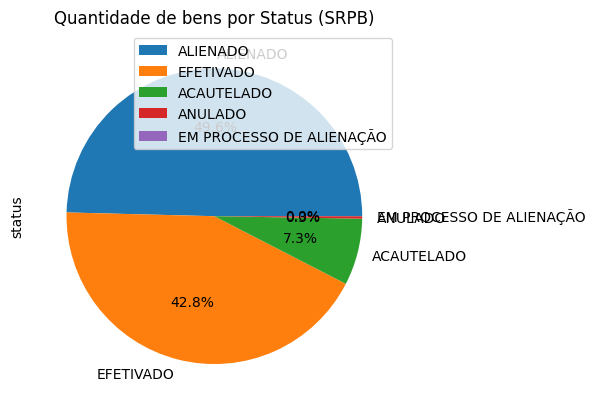

In [21]:
bens_por_status = base_elog.groupby('status')['status'].count().sort_values(ascending=False)
grafico_ativos = bens_por_status.plot(kind='pie', title = f'Quantidade de bens por Status ({selected_UG})',
                     legend = True,
                     #labels = None
                      autopct='%1.1f%%'
                     )
grafico_ativos.legend(loc="upper right")
grafico_ativos.plot()


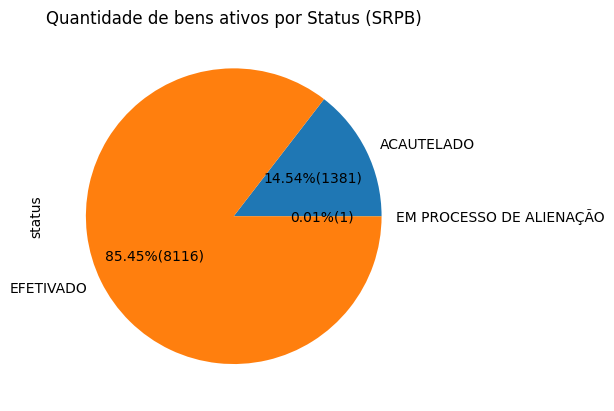

In [22]:
bens_ativos = base_elog[base_elog.status.isin(['EFETIVADO','ACAUTELADO','BEM NÃO LOCALIZADO', 'EM PROCESSO DE ALIENAÇÃO', 'PENDENTE DE DISTRIBUIÇÃO PARA USO'])]
bens_ativos.groupby('status')['status'].count().plot(kind='pie',
                                                     title = f'Quantidade de bens ativos por Status ({selected_UG})',
                                                     autopct = lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*bens_ativos.status.count()) # em valor absoluto
                                                     );


## Proporção de bens acautelados assinados


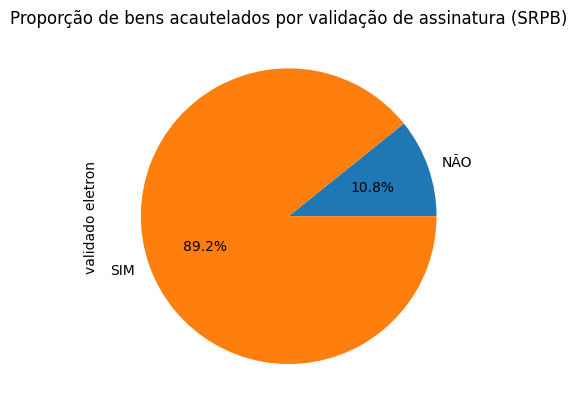

In [23]:
bens_acautelados = bens_ativos[bens_ativos.status == 'ACAUTELADO']
num_acautelados = len(bens_acautelados)

bens_acautelados.groupby('validado eletron')['validado eletron'].count().sort_values(ascending=True).plot(kind='pie',
                                                     title = f'Proporção de bens acautelados por validação de assinatura ({selected_UG})',
                                                     autopct='%1.1f%%');

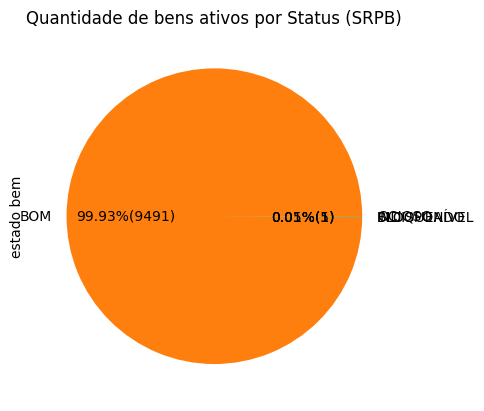

In [24]:
bens_ativos.groupby('estado bem')['estado bem'].count().plot(kind='pie',
                                                     title = f'Quantidade de bens ativos por Status ({selected_UG})',
                                                     autopct = lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*bens_ativos.status.count()) # em valor absoluto
                                                        );

## Quantitativo de Inventariados

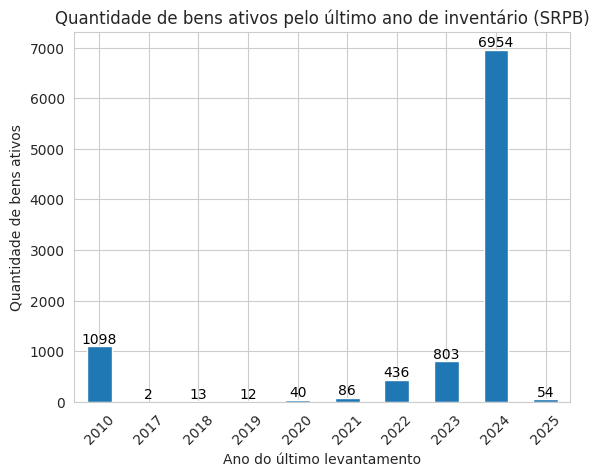

In [25]:
histograma_levantamento = bens_ativos.groupby('ano do levantamento')['ano do levantamento'].count()#

#plotar histograma
with sns.axes_style('whitegrid'):
    grafico = histograma_levantamento.plot(kind='bar', title=f'Quantidade de bens ativos pelo último ano de inventário ({selected_UG})');
    grafico.set_xlabel('Ano do último levantamento')
    grafico.set_ylabel('Quantidade de bens ativos')
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)

# colocar valores nas barras
for i, v in enumerate(histograma_levantamento):
    grafico.text(i, v, str(v), ha='center', va='bottom')



<ipython-input-26-d0cad96ca1df>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico_contagem.set_xticklabels(grafico_contagem.get_xticklabels(), rotation=45)


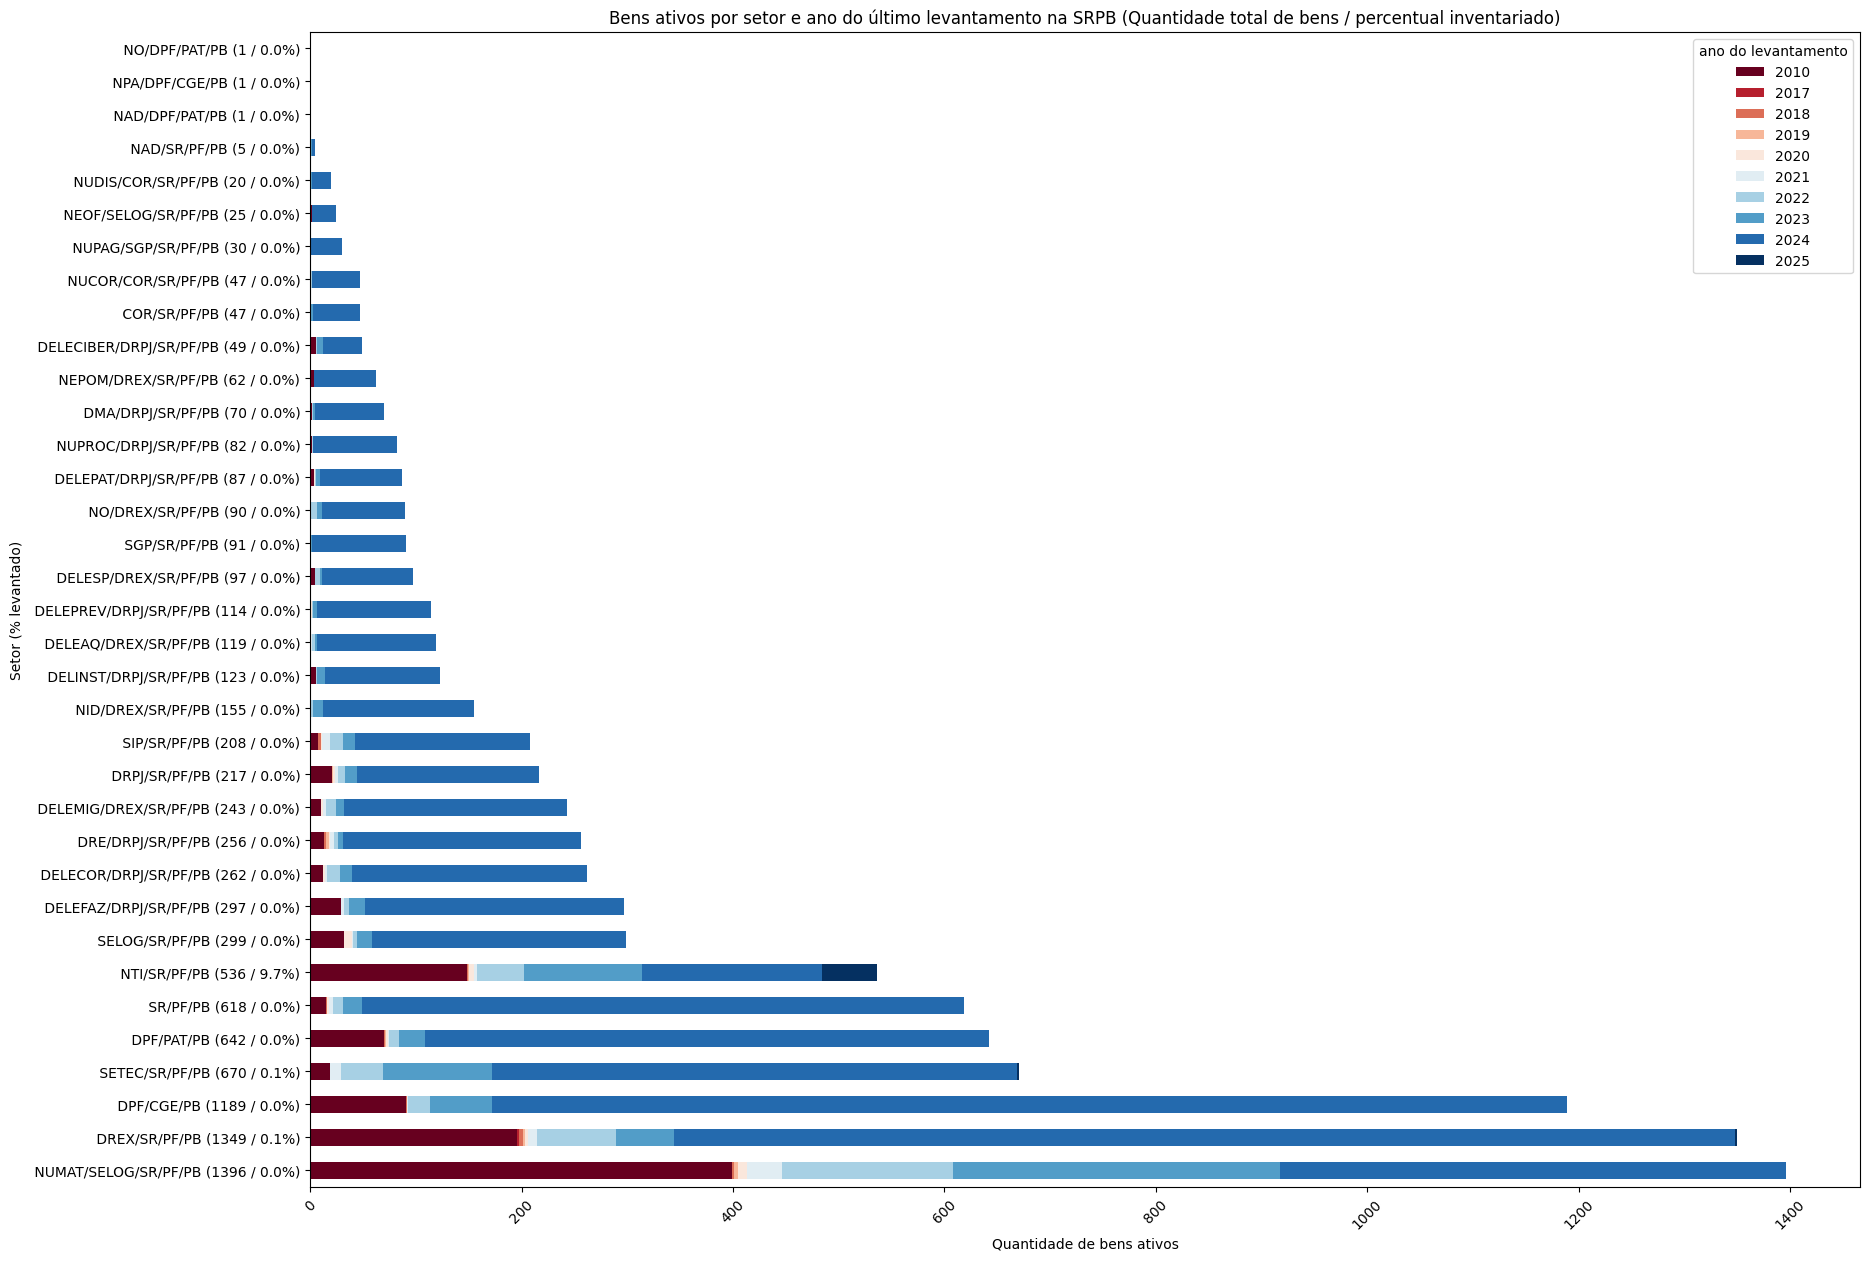

In [26]:
# Calcular a contagem para cada setor e ano
contagem = bens_ativos.groupby(['sigla', 'ano do levantamento']).size().unstack()

# calcular soma da quantidade de bens ativos de cada linha
contagem['soma'] = contagem.sum(axis=1).fillna(0).astype(int)

# calcular percentual de 'ano levantamento' = 2024 em relação ao total
contagem['percentual'] = contagem[2025]/contagem['soma']
contagem['percentual'] = contagem['percentual'].mul(100).round(1).fillna(0)

#transformar em string

contagem['soma'] = contagem['soma'].astype(str)
contagem['percentual'] = contagem['percentual'].astype(str)

contagem['sigla'] = contagem.index.get_level_values('sigla')
contagem['sigla'] = contagem['sigla'] + ' (' + contagem['soma'].astype(str) + ' / ' + contagem['percentual'].astype(str) + '%)'

contagem = contagem.drop(columns=['percentual'])

#somar os valores de todas colunas de cada linhas, exceto coluna sigla
colunas_numericas = contagem.select_dtypes(include=['float64', 'int64']).columns

contagem['total'] = contagem[colunas_numericas].sum(axis=1)

#ordenar por total
contagem = contagem.sort_values(by='total', ascending=False)
contagem = contagem.drop(columns=['total'])

#plotar com plotly

# Plotar o gráfico de barras empilhadas
grafico_contagem = contagem.plot(kind='barh',
                                 x = 'sigla',
                                stacked=True,
                                title=f'Bens ativos por setor e ano do último levantamento na {selected_UG} (Quantidade total de bens / percentual inventariado)',
                                 colormap = 'RdBu')
grafico_contagem.set_ylabel('Setor (% levantado)')
grafico_contagem.set_xlabel('Quantidade de bens ativos')
grafico_contagem.set_xticklabels(grafico_contagem.get_xticklabels(), rotation=45)
grafico_contagem.figure.set_size_inches(20, 15); # tamanho

In [27]:
# imprimir data de ontem
print(f'Situação:               {dt.date.today() - dt.timedelta(days=1)}')
print(f'Bens inventariados:     {round(len(bens_ativos[bens_ativos["ano do levantamento"] == 2025])/len(bens_ativos)*100,2)}%')
print(f'Bens inventariados:     {len(bens_ativos[bens_ativos["ano do levantamento"] == 2025])}')
print(f'Bens não inventariados: {round(100-len(bens_ativos[bens_ativos["ano do levantamento"] == 2025])/len(bens_ativos)*100,2)}%')
print(f'Bens não inventariados: {len(bens_ativos[bens_ativos["ano do levantamento"] != 2025])}')


Situação:               2025-05-18
Bens inventariados:     0.57%
Bens inventariados:     54
Bens não inventariados: 99.43%
Bens não inventariados: 9444


## Comparativo de quantidade de colunas

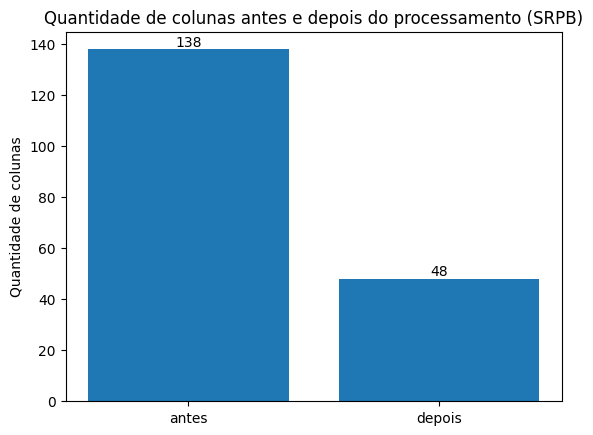

Index(['num tombamento', 'unidade responsavel material', 'codigo',
       'grupo de material', 'codigo material', 'subgrupo de material',
       'acautelado para', 'matricula detentor', 'validado eletron',
       'data assinatura', 'lotacao detentor', 'data acautelamento',
       'data cadastro', 'denominacao', 'especificacao', 'observacao',
       'anulado', 'estado bem', 'status', 'bem terceiros', 'data balanco',
       'data inicio uso', 'ano balanco', 'garantia', 'data fabricacao',
       'data validade', 'localidade', 'ultimo levantamento',
       'unidade tombamento', 'valor', 'valor entrada', 'valor acumulado',
       'depreciavel', 'valor depreciacao acumulada', 'data ultimo ajuste',
       'vida util', 'vida util base depreciacao',
       'data ultimo ajuste depreciacao', 'tipo bloqueio', 'descritor especial',
       'temporario', 'n  serie', 'serie_total', 'modelo_total',
       'especificacoes', 'tombo_antigo', 'marca_total', 'sigla'],
      dtype='object')

In [28]:
base_elog.drop(columns='ano do levantamento', inplace=True)

qtd_colunas = [qtde_colunas_antes, qtde_colunas_depois]

plt.bar(['antes', 'depois'], qtd_colunas)
plt.ylabel('Quantidade de colunas')
plt.title(f'Quantidade de colunas antes e depois do processamento ({selected_UG})')
plt.text(0, qtd_colunas[0], f'{qtd_colunas[0]}', ha='center', va='bottom')
plt.text(1, qtd_colunas[1], f'{qtd_colunas[1]}', ha='center', va='bottom')
plt.show()
base_elog.columns

## Comparativo de arquivos

O novo tamanho do arquivo .xlsx é: 3.835857391357422 MB


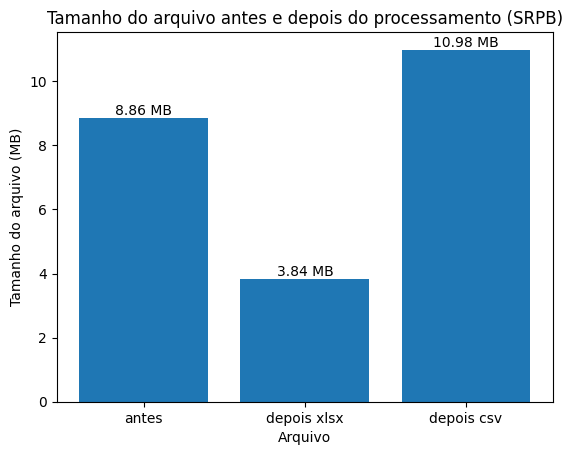

In [29]:
# Exportação dos arquivos
excel_exportacao = base_elog.to_excel(f"lista_bens-{selected_UG}-processado.xlsx", sheet_name='Sheet0', index=False)
csv_exportacao = base_elog.to_csv(f"lista_bens-{selected_UG}-processado.csv", index=False)


# Medição de tamanho do arquivo
filepath = f"lista_bens-{selected_UG}-processado.xlsx"
tamanho_novo_arquivo_xlsx = pega_tamanho_em_mb(filepath)

filepath = f"lista_bens-{selected_UG}-processado.csv"
tamanho_novo_arquivo_csv = pega_tamanho_em_mb(filepath)


print(f"O novo tamanho do arquivo .xlsx é: {tamanho_novo_arquivo_xlsx} MB")

tamanhos_arquivo = [tamanho_antigo_arquivo, tamanho_novo_arquivo_xlsx, tamanho_novo_arquivo_csv]
plt.bar(['antes', 'depois xlsx','depois csv'], tamanhos_arquivo)
plt.xlabel('Arquivo')
plt.ylabel('Tamanho do arquivo (MB)')
plt.title(f'Tamanho do arquivo antes e depois do processamento ({selected_UG})')
plt.text(0, tamanhos_arquivo[0], f'{tamanhos_arquivo[0]:.2f} MB', ha='center', va='bottom')
plt.text(1, tamanhos_arquivo[1], f'{tamanhos_arquivo[1]:.2f} MB', ha='center', va='bottom')
plt.text(2, tamanhos_arquivo[2], f'{tamanhos_arquivo[2]:.2f} MB', ha='center', va='bottom')
plt.show()


#Retorno do arquivo

In [30]:
files.download(f'/content/lista_bens-{selected_UG}-processado.xlsx')
#files.download(f'/content/lista_bens-{selected_UG}-processado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>